1. [Wstęp:](#wstep)
    - [Wczytanie bibliotek](#biblio1)
    - [Wczytanie ścieżki do pliku](#filePath)
    - [Funkcja odczytująca eventy](#event1)
    - [Funkcja zwracająca momenty rozpoczęcia i zakończenia eventów](#eventFunkcja)
 
 
2. [Program I - Płyta naciskowa Normalizacja](#program1)
    - [Wybranie interesujących wartośći z pliku](#wyborWartosci)
    - [Wyświetlenie całych przebiegów wybranych wartości ](#calyPrzebieg)
    - [Wykreślenie charakterystyk pojedyńczych uderzeń](#podzieloneWykresy)
    - [Normalizacja wyników ](#normalizacjaWykresow)


3. [Program II - EMG Analiza](#emgAnaliza)
    - [Wybranie interesujących wartośći z pliku](#wyborWartosciEmg)
    - [Wyświetlenie całych przebiegów wybranych wartości ](#calyPrzebiegEmg)
    - [Wykreślenie charakterystyk pojedyńczych uderzeń wzraz z uśrednionymy wartościami](#podEmg)
    - [Przebieg pracy mięśni dla jednego uderzenia](#przebiegJeden)
    - [Przebieg pracy mięśni dla pięciu uderzeń](#przebiegPiec)
    - [Porównanie pracy mięśni dla pięciu uderzeń na jednym wykresie](#porowaniePiec)    


## Wczytanie bibliotek  <a name="biblio1"></a>

In [1]:
import numpy as np
import itertools 
import ezc3d
import matplotlib.pyplot as plt
from pathlib import Path
from math import sqrt
from tqdm import tqdm
import data_procesing as dp
import numpy as np
import importlib
import glob

## Wczytanie ścieżki do pliku   <a name="filePath"></a>

In [2]:
path="2020-08-05-B0444-S01-E01-T03.c3d"

## Funkcja odczytująca eventy  <a name="event1"></a>

In [3]:
from ezc3d import c3d

def read_labels(data_path):
    c3d_to_compare= c3d(data_path)
    event = c3d_to_compare['parameters']['EVENT']['LABELS']['value']
    time = np.around(c3d_to_compare['parameters']['EVENT']['TIMES']['value'][1]*1000)
    
    return [event, time]

In [4]:
read_labels(path)

[['Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike'],
 array([ 1530.,  4170.,  6500.,  8910., 11420., 13820., 16085., 18445.,
        20995., 23460., 25700.,  3085.,  5475.,  7645., 10230., 12710.,
        14875., 17270., 19525., 22335., 24530.])]

## Funkcja zwracająca momenty rozpoczęcia i zakończenia eventów    <a name="eventFunkcja"></a>

In [5]:
import data_procesing as dp
import importlib
def read_events(data_path):
    importlib.reload(dp)
    eventy = dp.read_labels(data_path)

    eventy[0].index('Foot Strike')


    indxE = [i for i, x in enumerate(eventy[0]) if x == "Event"]
    indxFS = [i for i, x in enumerate(eventy[0]) if x == "Foot Strike"]


    CzasFS = np.zeros(len(indxFS))
    for i in range(len(indxFS)):
        CzasFS[i] = eventy[1][indxFS[i]]

    CzasE = np.zeros(len(indxE))
    for i in range(len(indxE)):
        CzasE[i] = eventy[1][indxE[i]]
    eventy[1].sort()


    p=np.zeros(10)
    d=np.zeros(10)
    j=0
    for i in range(len(eventy[1])):
        if not i >= len(eventy[1])-2:
            pierwszy = eventy[1][i]
            drugi = eventy[1][i+1]
            trzeci = eventy[1][i+2]
            if pierwszy in CzasE:
                if drugi in CzasFS:
                    if trzeci in CzasE:
                        p[j]=pierwszy
                        d[j]=trzeci
                        j+=1
    p=p.astype(int)
    d=d.astype(int)
    
    return[p,d]

In [6]:
read_events(path)

[array([ 1530,  4170,  6500,  8910, 11420, 13820, 16085, 18445, 20995,
        23460]),
 array([ 4170,  6500,  8910, 11420, 13820, 16085, 18445, 20995, 23460,
        25700])]

# Program I - Płyta naciskowa Normalizacja  <a name="program1"></a>

## Wybranie interesujących wartośći z pliku  <a name="wyborWartosci"></a>

In [7]:
import sys
from matplotlib.pyplot import subplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from matplotlib import scale as mscale
from pyomeca import Analogs

def normalize_data(data_path):
    
    muscles = ["Moment.Mx1","Moment.My1", "Moment.Mz1", "Moment.Mx2","Moment.My2", "Moment.Mz2",
                "Force.Fx1","Force.Fy1","Force.Fz1","Force.Fx2","Force.Fy2","Force.Fz2"]
    muscles_names = ["Moment.Mx1","Moment.My1", "Moment.Mz1", "Moment.Mx2",
                     "Moment.My2", "Moment.Mz2","Force.Fx1","Force.Fy1","Force.Fz1","Force.Fx2","Force.Fy2","Force.Fz2"]
    muscles_names2 = [["Moment.Mx1"],["Moment.My1"], ["Moment.Mz1"], ["Moment.Mx2"],["Moment.My2"], ["Moment.Mz2"],
                     ["Force.Fx1"],["Force.Fy1"],["Force.Fz1"],["Force.Fx2"],["Force.Fy2"],["Force.Fz2"]]

    emg = Analogs.from_c3d(data_path, usecols=muscles)


    emg_p= (
    emg.meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=1, cutoff=5, freq=emg.rate)
    .meca.normalize(ref=None, scale=1)
    )
    return emg_p

In [8]:
processed=normalize_data(path)

## Wyświetlenie całych przebiegów wybranych wartości  <a name="calyPrzebieg"></a>

In [9]:
def show_data(processed):
    processed.plot(x="time", col="channel", col_wrap=3)


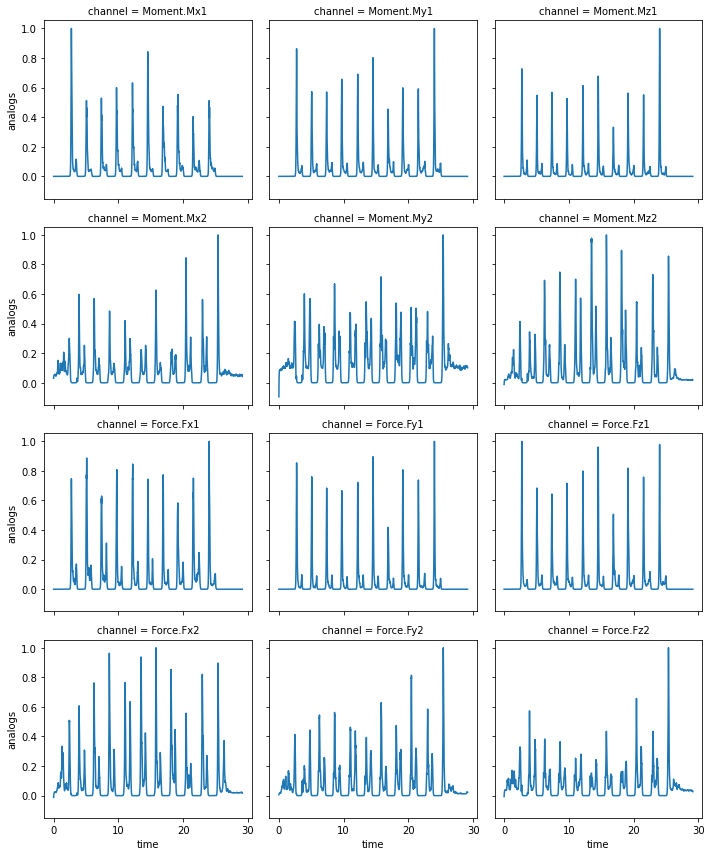

In [10]:
show_data(processed)

## Wykreślenie charakterystyk pojedyńczych uderzeń  <a name="podzieloneWykresy"></a>

In [11]:
def show_events(emg_processed,data_path):
    muscles_names2 = ["Moment.Mx1","Moment.My1", "Moment.Mz1", "Moment.Mx2","Moment.My2", "Moment.Mz2",
                "Force.Fx1","Force.Fy1","Force.Fz1","Force.Fx2","Force.Fy2","Force.Fz2"]
    p,d=read_events(path)
    for num in range(12):
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2.8, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
        for i in range(10):
               
            emg_processed_event=emg_processed[num][p[i]:d[i]]

            plt.plot(emg_processed_event)
            plt.title(muscles_names2[num])

        subplot(1, 2, 2)
        plt.plot(emg_processed[num])
        plt.title(muscles_names2[num])
        plt.show()

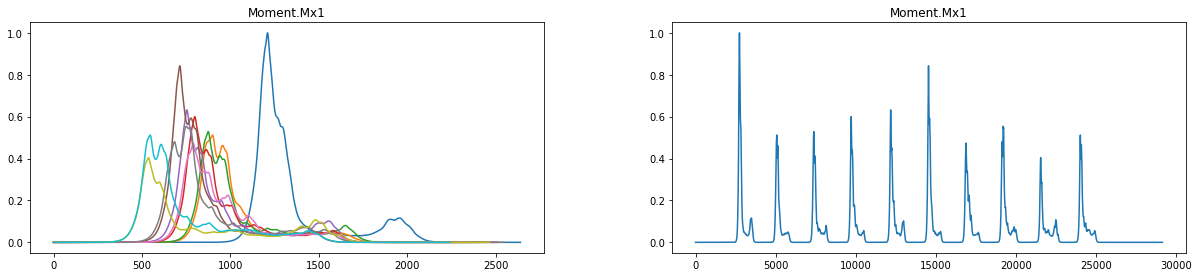

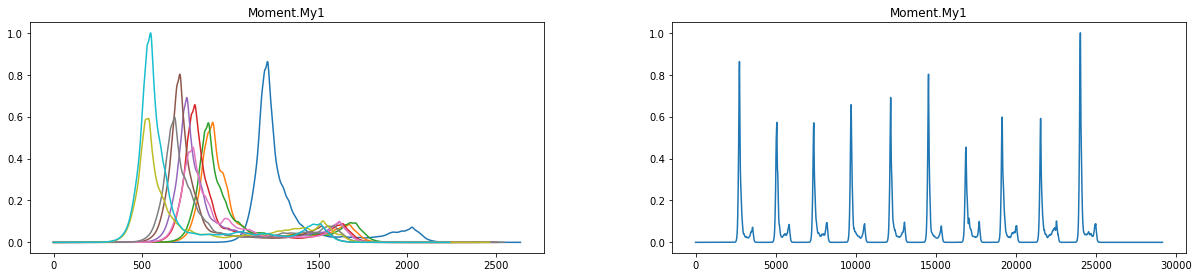

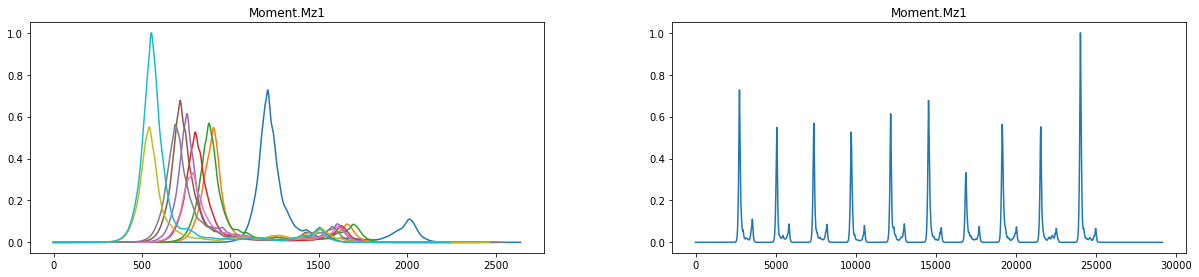

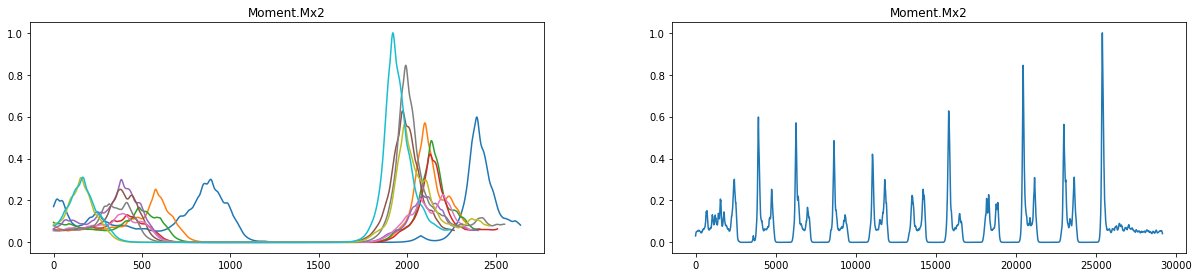

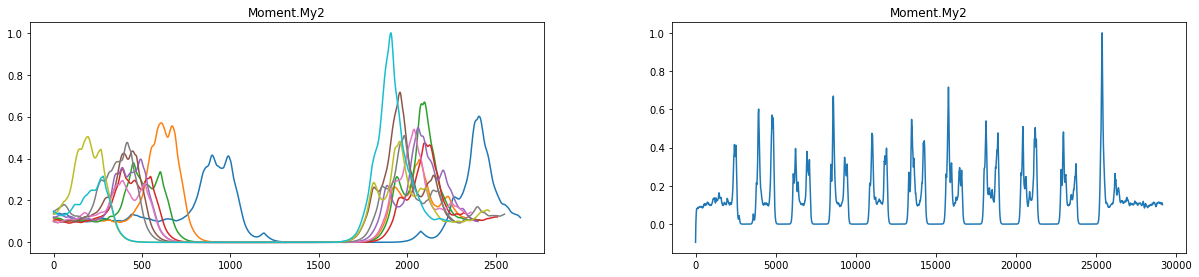

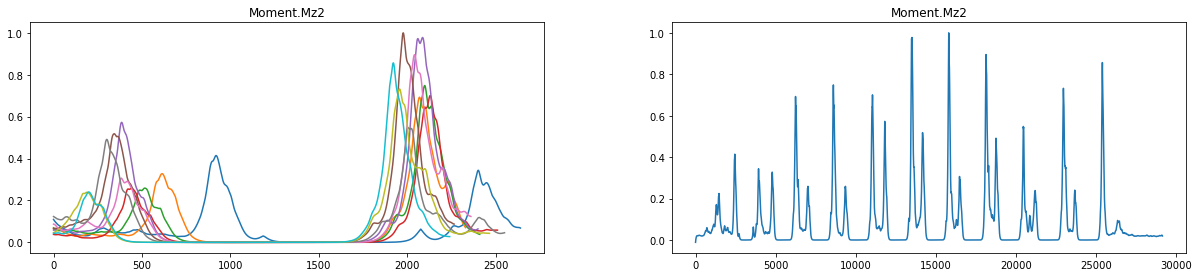

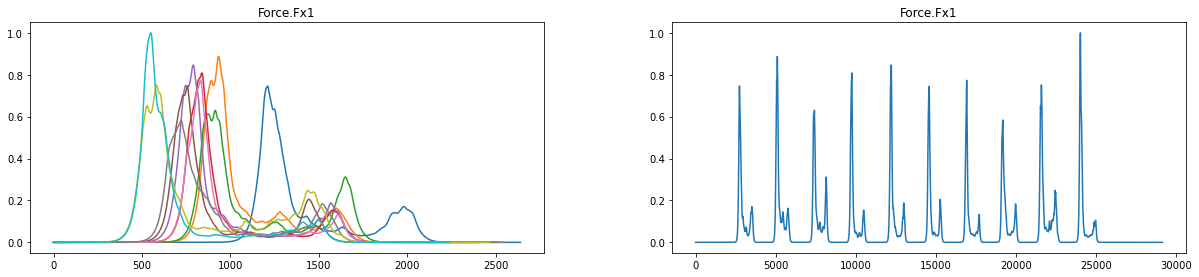

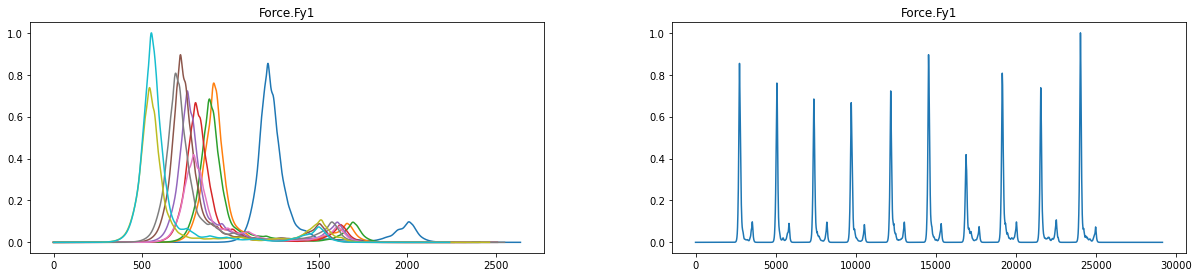

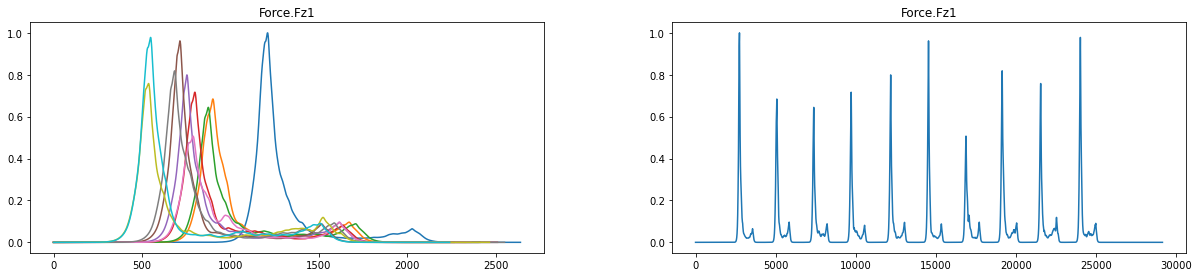

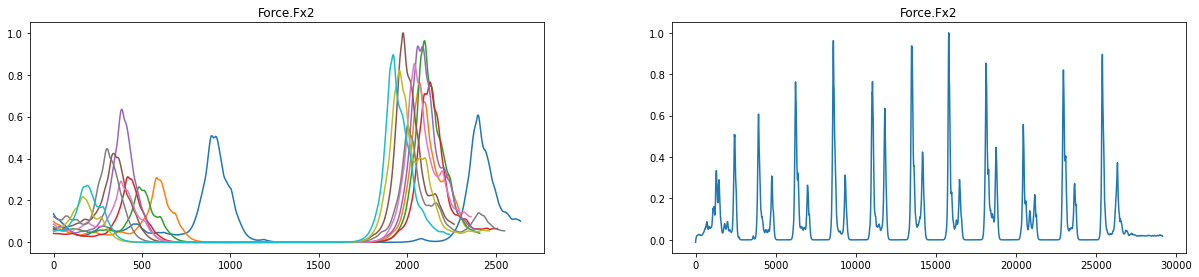

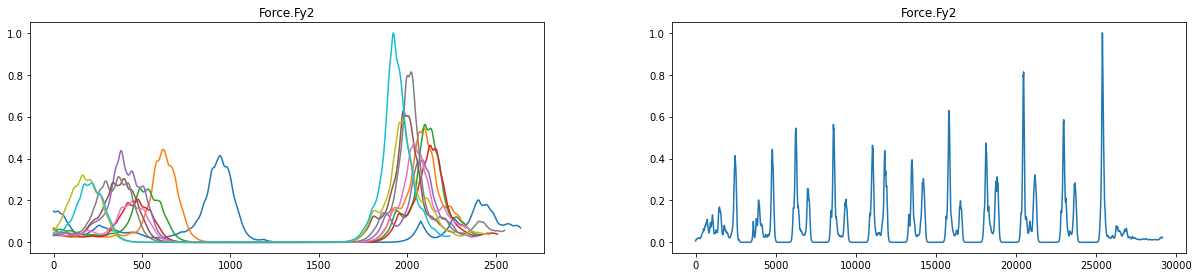

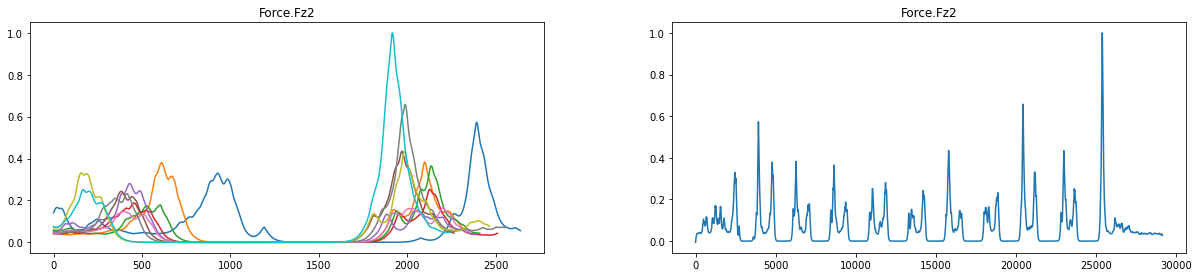

In [12]:
show_events(processed,path)

## Normalizacja wyników  <a name="normalizacjaWykresow"></a>

In [13]:
def show_events_norm(emg_processed,data_path):
    muscles_names2 =["Moment.Mx1","Moment.My1", "Moment.Mz1", "Moment.Mx2","Moment.My2", "Moment.Mz2",
                "Force.Fx1","Force.Fy1","Force.Fz1","Force.Fx2","Force.Fy2","Force.Fz2"]
    p,d=read_events(path)
    for j in range(12):
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2.5, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
        for i in range(len(p)):
            t_konc=25
            dl_ciagu=d[i]-p[i]
            x=np.linspace(0,t_konc,dl_ciagu)
            emg_processed_event=emg_processed[j][p[i]:d[i]]
            emg_processed_event2 = (
            emg_processed_event.meca.abs()
            .meca.normalize(ref=None,scale=1)
            )                
            plt.plot(x,emg_processed_event2)
            plt.title(muscles_names2[j])
        subplot(1, 2, 2)
        plt.plot(emg_processed[j])
        plt.title(muscles_names2[j])
        plt.show()

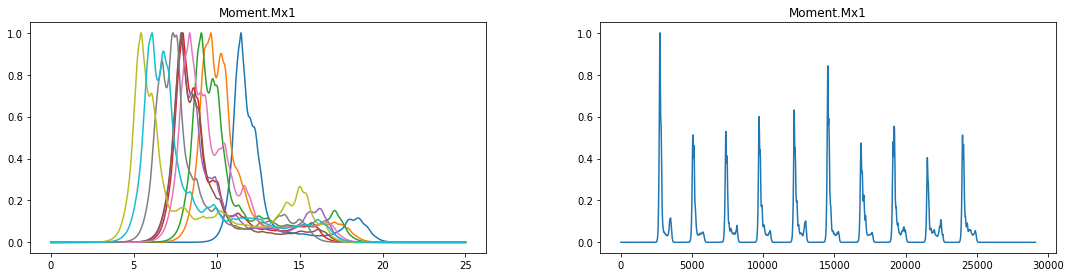

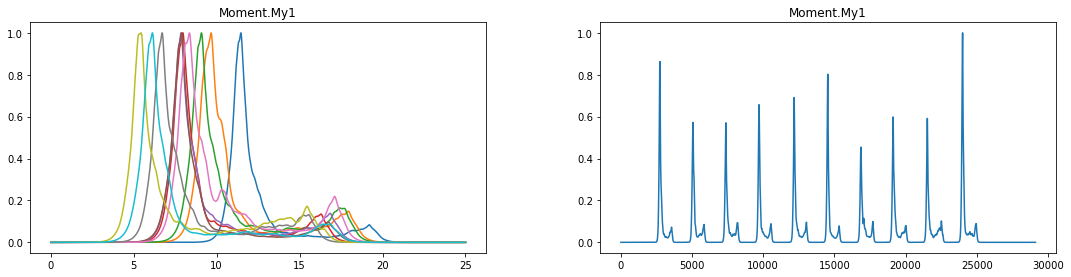

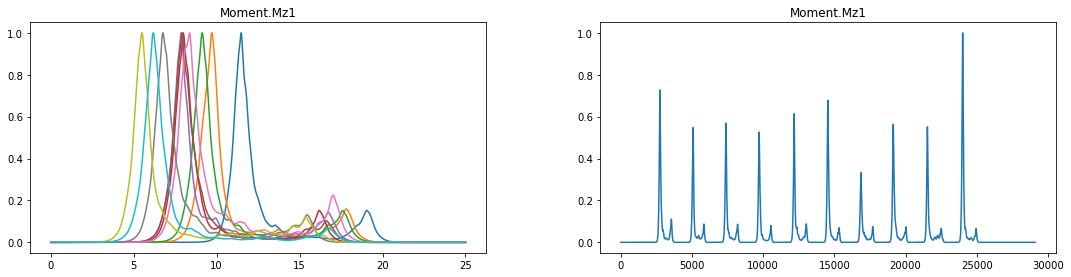

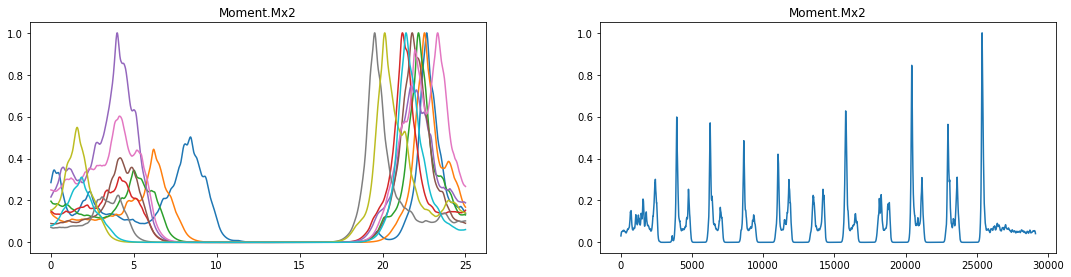

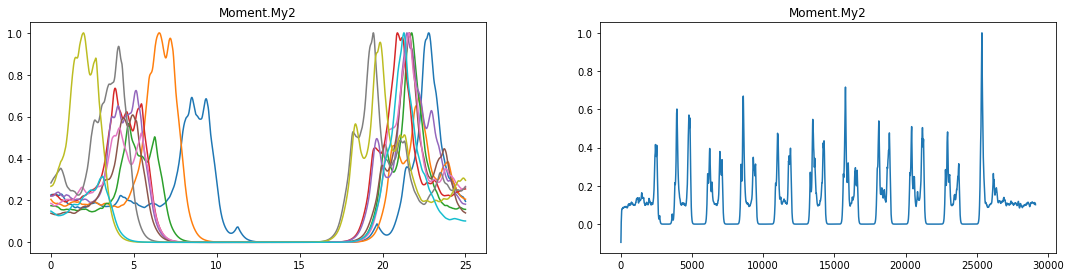

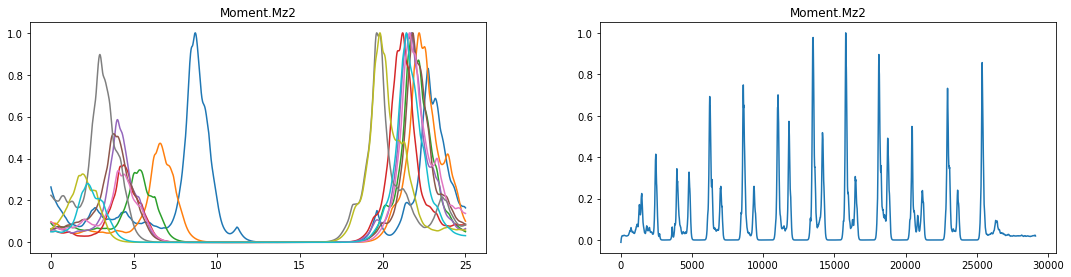

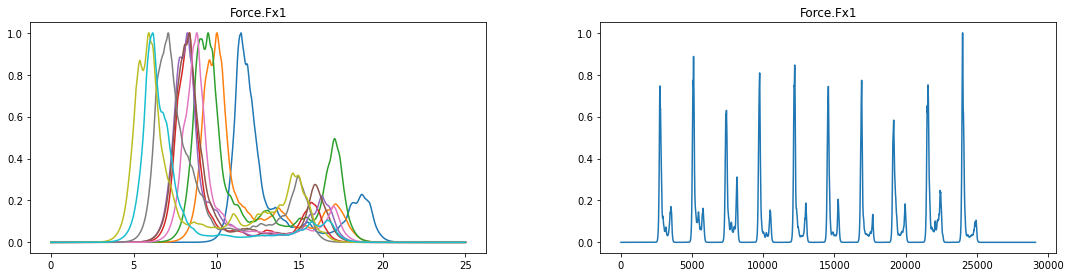

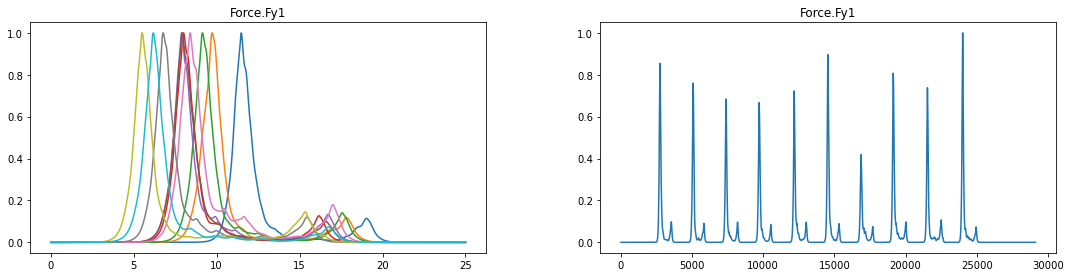

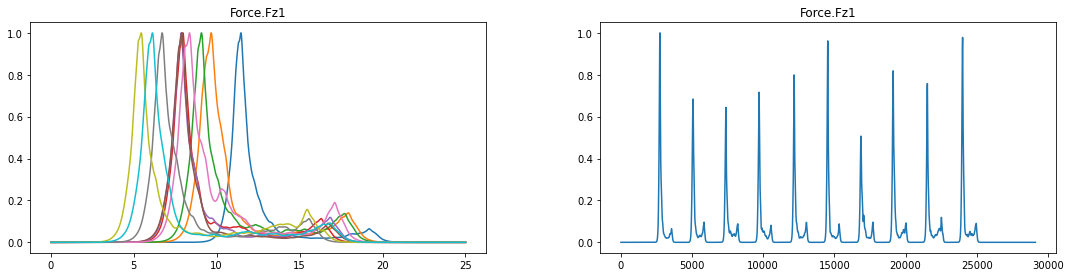

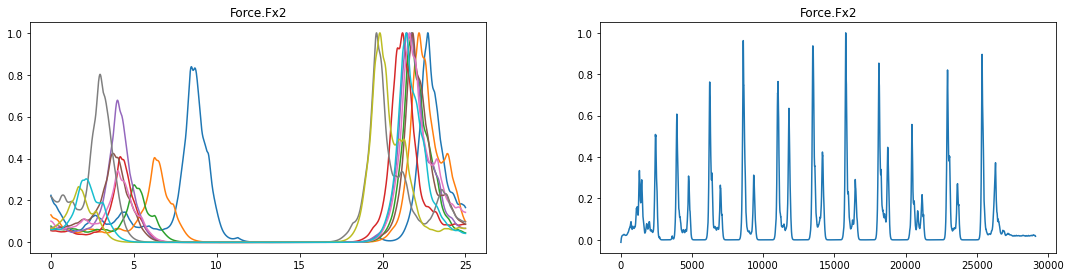

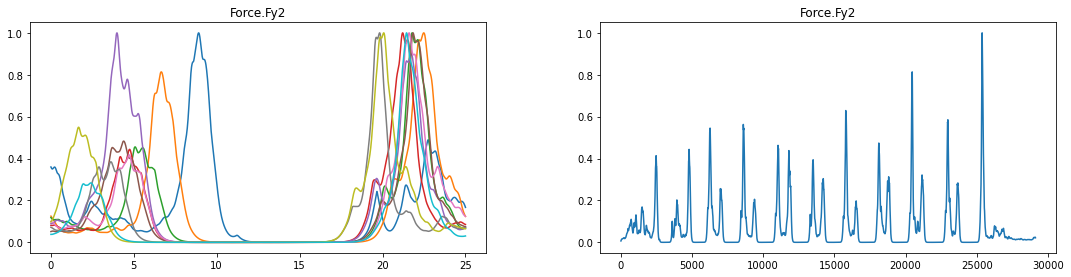

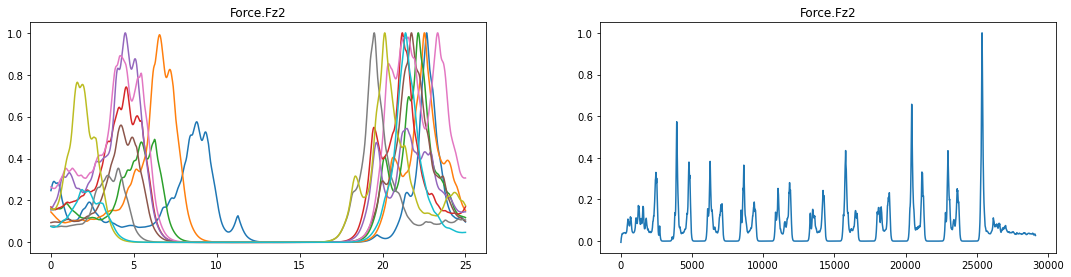

In [14]:
show_events_norm(processed,path)

# Program II - EMG Analiza <a name="emgAnaliza"></a>

In [15]:
import dataprocesing as dp
import numpy as np
import importlib


def read_events(data_path):
    importlib.reload(dp)
    eventy = dp.read_labels(data_path,1000)

    eventy[0].index('Foot Strike')


    indxE = [i for i, x in enumerate(eventy[0]) if x == "Event"]
    indxFS = [i for i, x in enumerate(eventy[0]) if x == "Foot Strike"]


    CzasFS = np.zeros(len(indxFS))
    for i in range(len(indxFS)):
        CzasFS[i] = eventy[1][indxFS[i]]

    CzasE = np.zeros(len(indxE))
    for i in range(len(indxE)):
        CzasE[i] = eventy[1][indxE[i]]
    eventy[1].sort()


    p=np.zeros(10)
    d=np.zeros(10)
    j=0
    for i in range(len(eventy[1])):
        if not i >= len(eventy[1])-2:
            pierwszy = eventy[1][i]
            drugi = eventy[1][i+1]
            trzeci = eventy[1][i+2]
            if pierwszy in CzasE:
                if drugi in CzasFS:
                    if trzeci in CzasE:
                        p[j]=pierwszy
                        d[j]=trzeci
                        j+=1
    p=p.astype(int)
    d=d.astype(int)
    
    return[p,d]

In [16]:
p,d = dp.read_labels(path, 1000)
print(p,d)

[1530, 4170, 6500, 8910, 11420, 13820, 16085, 18445, 20995, 23460] [4170, 6500, 8910, 11420, 13820, 16085, 18445, 20995, 23460, 25700]


## Wybranie interesujących wartośći z pliku  <a name="wyborWartosciEmg"></a>

In [17]:
import sys
from matplotlib.pyplot import subplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from matplotlib import scale as mscale
from pyomeca import Analogs
    
def normalize_data(data_path):

    muscles2 = [["Voltage.1"],["Voltage.2"],["Voltage.3"],["Voltage.4"],["Voltage.5"],["Voltage.6"],["Voltage.7"],["Voltage.8"],["Voltage.9"],["Voltage.10"],["Voltage.11"],["Voltage.12"],["Voltage.13"],["Voltage.14"],["Voltage.15"],["Voltage.16"]]
    muscles_names = [["Czworoboczny grzbietu L"],["Trójgłowy ramienia L"], ["Dwugłowy ramienia L"], ["Prostownik nadgarstka L"],["Skośny brzucha L"], ["Pośladkowy średni L"],["Czworogłowy uda L"], ["Brzuchaty łydki L"],["Czworoboczny grzbietu P"],["Trójgłowy ramienia P"], ["Dwugłowy ramienia P"], ["Prostownik nadgarstka P"],["Skośny brzucha P"], ["Pośladkowy średni P"],["Czworogłowy uda P"], ["Brzuchaty łydki P"]]
    muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]

    muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]

    max_val=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

    emg=Analogs.from_c3d(data_path, usecols=muscles)

    emg_p = (
    emg.meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize(ref=None, scale=1)
    )
     
    emg_p['channel'] = muscles_names2

    return emg_p 
    

In [18]:
processed=normalize_data(path)

## Wyświetlenie całych przebiegów wybranych wartości  <a name="calyPrzebiegEmg"></a>

In [19]:
def show_data(processed):
    processed.plot(x="time", col="channel", col_wrap=3)
    
def load_and_show_data(data_path):
    muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]
    processed=Analogs.from_c3d(data_path, usecols=muscles)
    processed.plot(x="time", col="channel", col_wrap=3)
    

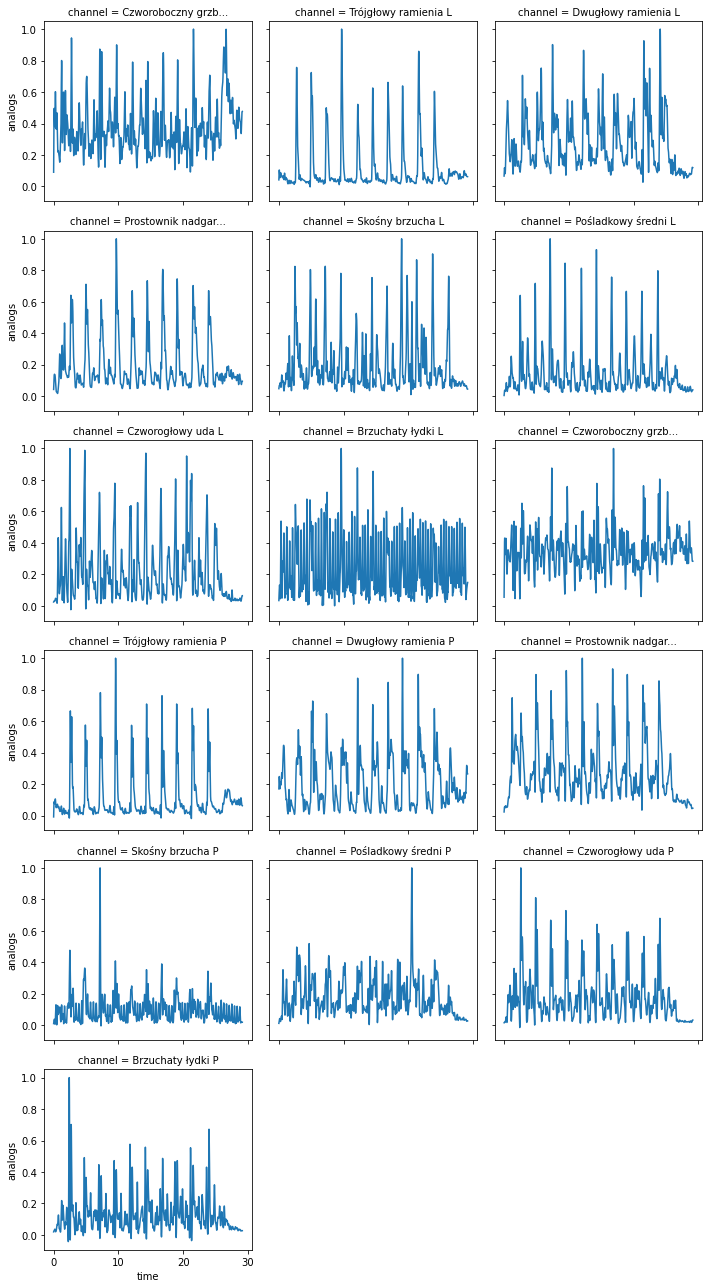

In [20]:
show_data(processed)

## Wykreślenie charakterystyk pojedyńczych uderzeń wzraz z uśrednionymy wartościami  <a name="podEmg"></a>

In [21]:
def show_avr(data_path,emg_processed=None):
    if emg_processed is None:
        emg_processed=normalize_data(data_path)
        
    muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
    aver_arr=np.zeros((16,1000)) 
    p,d=dp.read_labels(data_path, 1000)
    for num in range(16):
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2.8, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
        for i in range(len(p)):
        
                   
            emg_processed_event=emg_processed[num][p[i]:d[i]]
            emg_processed_event2 = (
            emg_processed_event.meca.normalize(scale=1)                
     )
            time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)
            plt.plot(time_normalized)     
            plt.title(muscles_names2[num])


        #aver_arr.append([])
        subplot(1, 2, 2)
        for i in range(len(p)):
        
                   
            emg_processed_event=emg_processed[num][p[i]:d[i]]
            emg_processed_event2 = (
            emg_processed_event.meca.normalize(scale=1)                
     )
            time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)
#             plt.plot(time_normalized)     
#             plt.title(muscles_names2[num])
            for t in range(1000):
                aver_arr[num][t]=aver_arr[num][t]+time_normalized.values[t]
                
        aver_arr[num]=aver_arr[num]/10
        time=np.linspace(1,1000,1000)
        plt.plot(time,aver_arr[num])     
        plt.title(muscles_names2[num])
        plt.show()
        
    return aver_arr
        

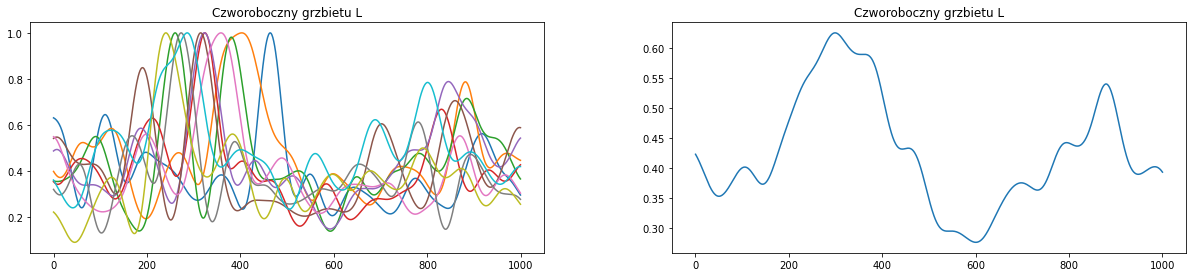

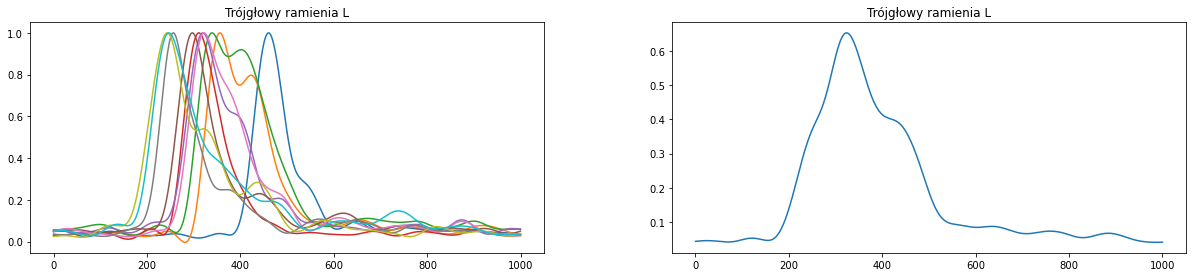

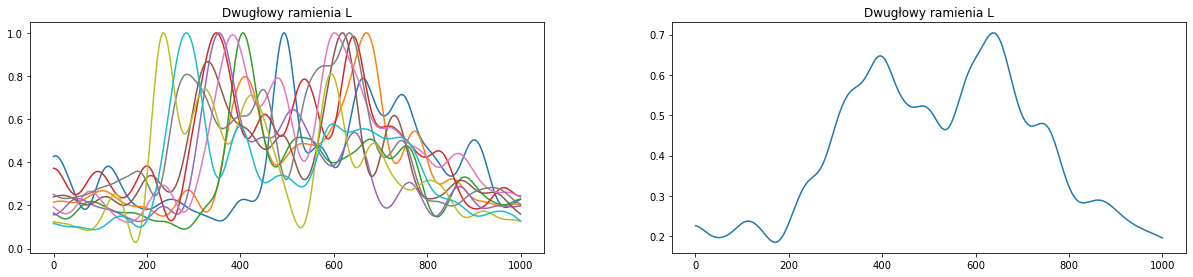

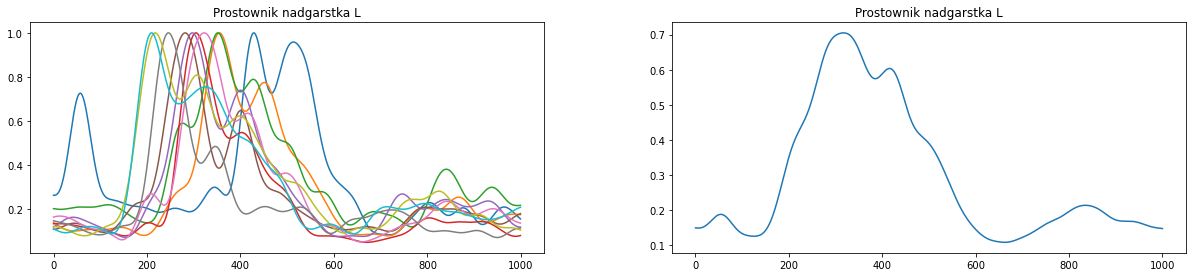

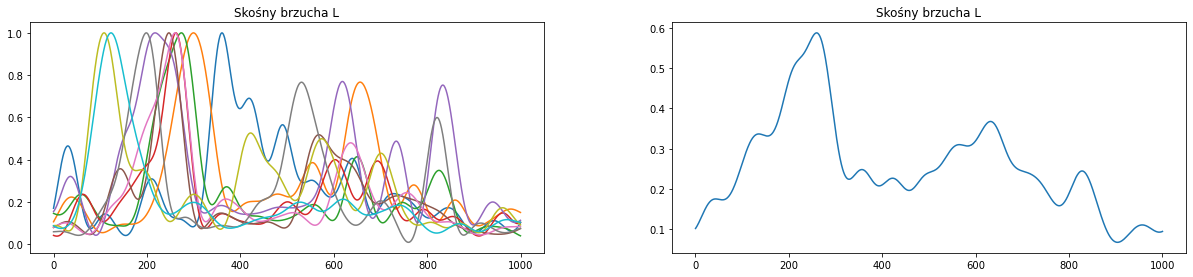

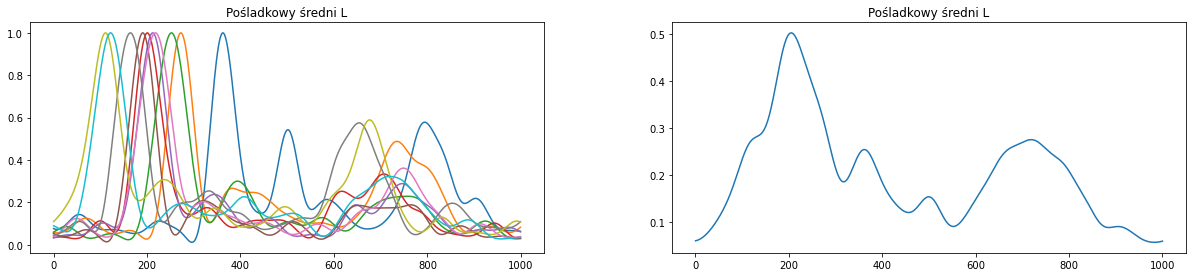

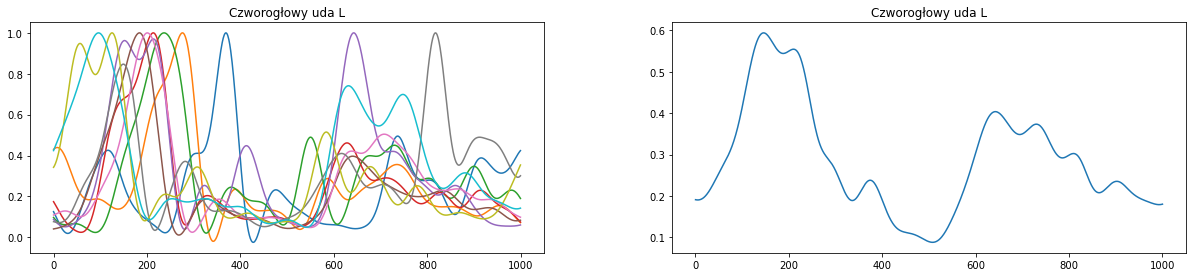

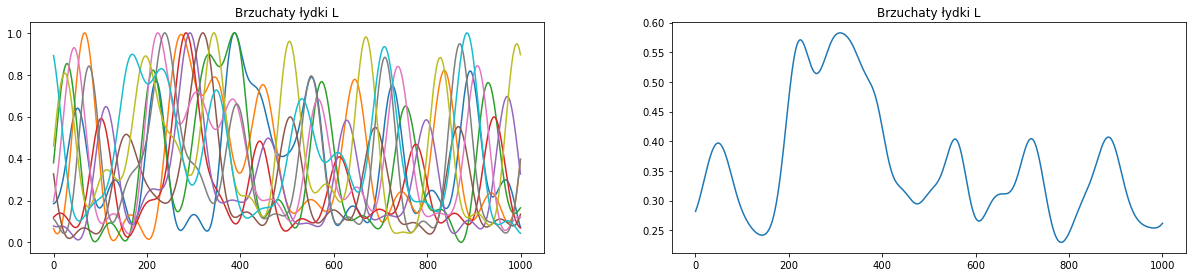

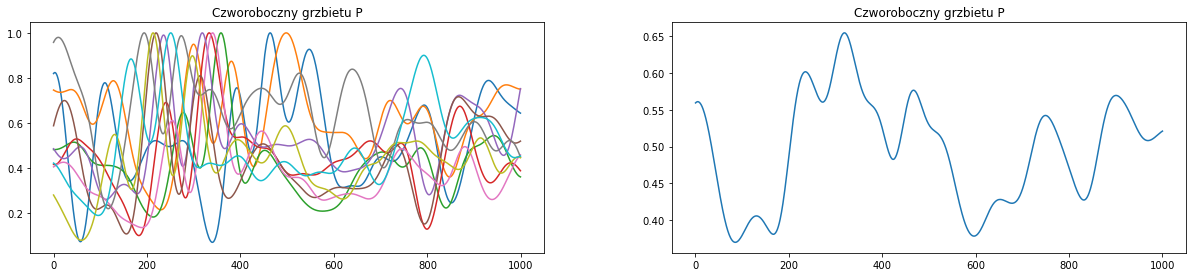

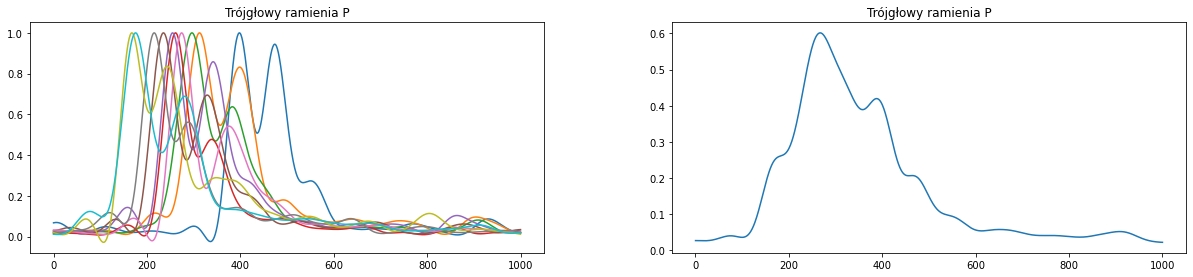

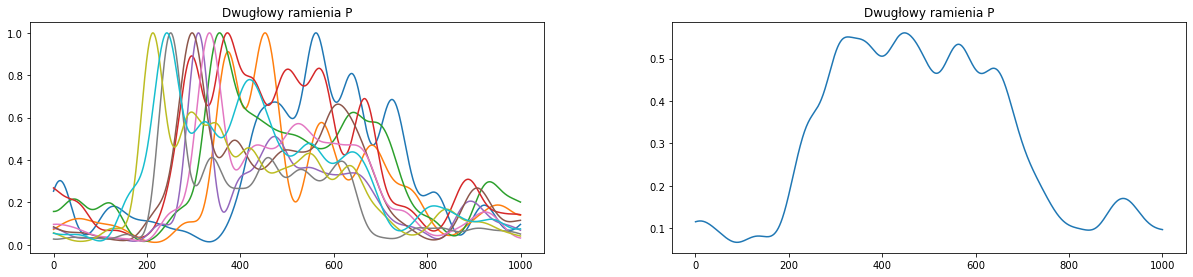

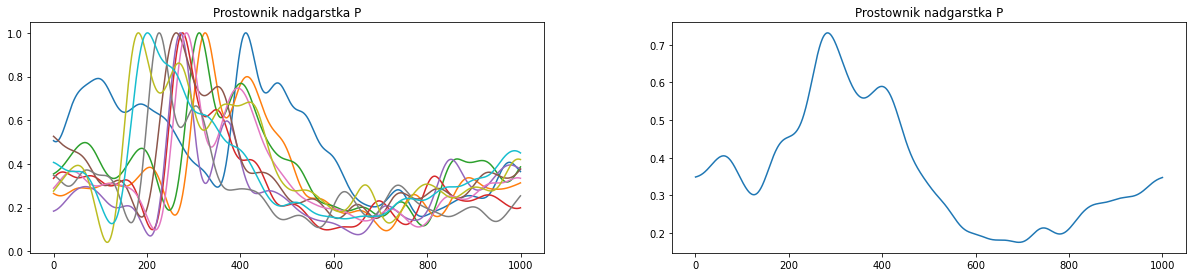

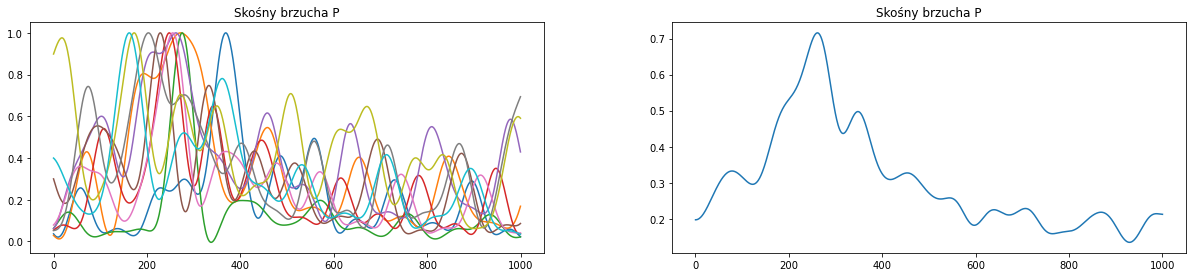

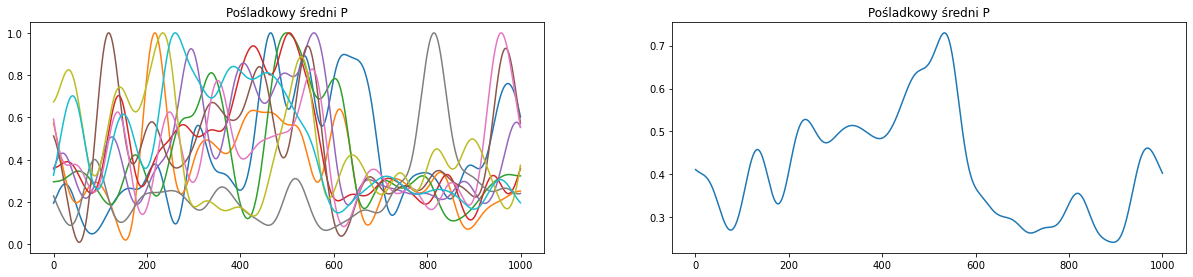

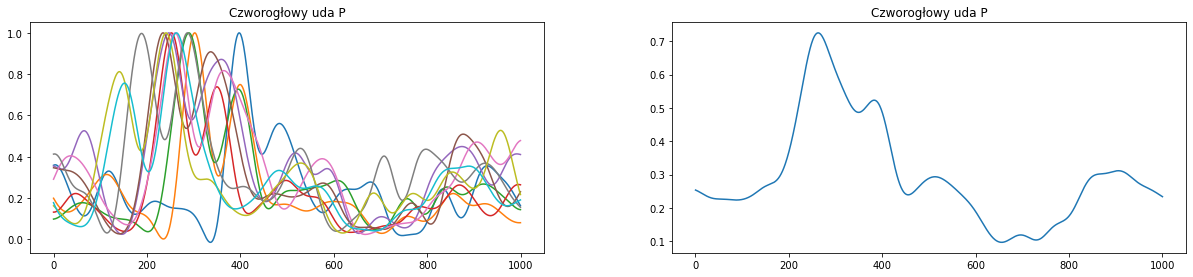

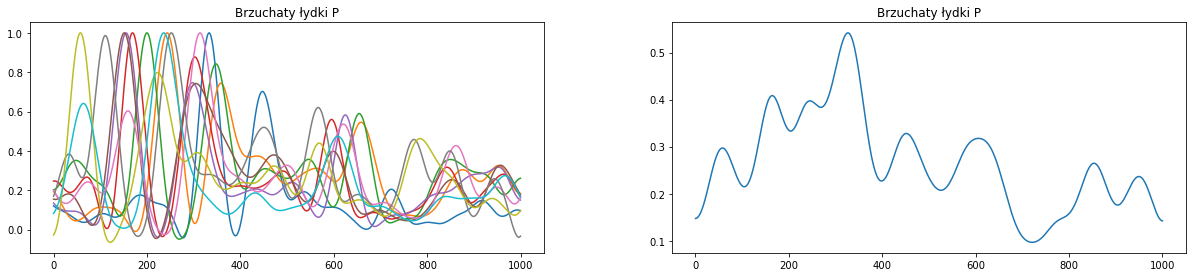

array([[0.42303197, 0.42166277, 0.42024155, ..., 0.39541394, 0.3943905 ,
        0.3932981 ],
       [0.04288198, 0.04301935, 0.04315562, ..., 0.04017913, 0.04021929,
        0.04026247],
       [0.22605653, 0.22577629, 0.22544177, ..., 0.19685018, 0.19626024,
        0.19566791],
       ...,
       [0.41130476, 0.41034098, 0.40942848, ..., 0.4076209 , 0.40523564,
        0.40286308],
       [0.25332185, 0.25272489, 0.25210005, ..., 0.23524878, 0.23434161,
        0.23343773],
       [0.14742038, 0.14756914, 0.14790846, ..., 0.14290805, 0.14248591,
        0.14227646]])

In [22]:
show_avr(path,processed)

## Przebieg pracy mięśni dla jednego uderzenia  <a name="przebiegJeden"></a>

In [23]:
def show_avr2(data_path,emg_processed=None):
    if emg_processed is None:
        emg_processed=normalize_data(data_path)

    muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]

    aver_arr=np.zeros((16,1000)) 
    p,d=dp.read_labels(data_path, 1000)
    for num in range(16):
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=5, 
                    top=0.3, 
                    wspace=0.25, 
                    hspace=0.35)
        for i in range(len(p)):    
            emg_processed_event=emg_processed[num][p[i]:d[i]]
            emg_processed_event2 = (
            emg_processed_event.meca.normalize(ref=None, scale=1)            
        )
            time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)
            for t in range(1000):
                aver_arr[num][t]=aver_arr[num][t]+time_normalized.values[t]

        aver_arr[num]=aver_arr[num]/10
        time=np.linspace(1,1000,1000)
        plt.plot(time,aver_arr[num])     
        plt.title(muscles_names2[num])
        plt.fill_between(time,aver_arr[num])
        plt.show()
        
    return aver_arr
        

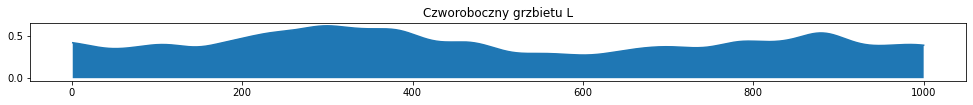

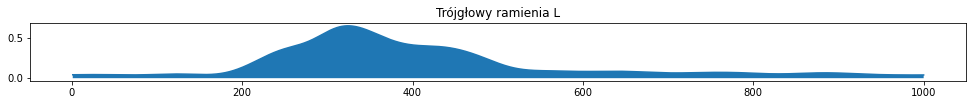

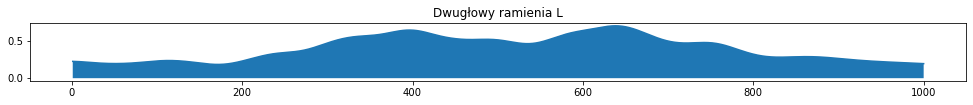

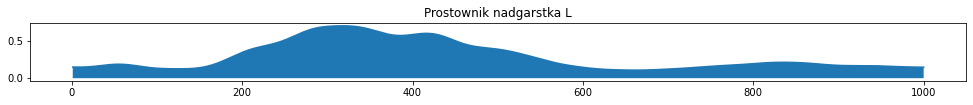

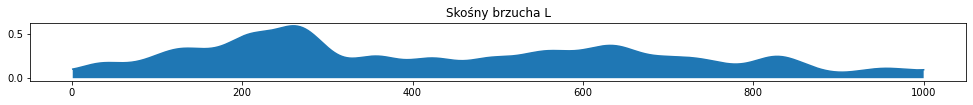

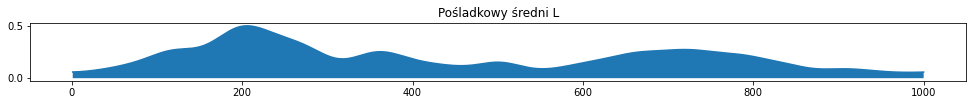

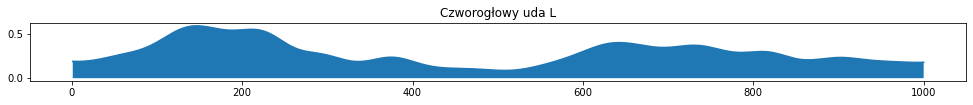

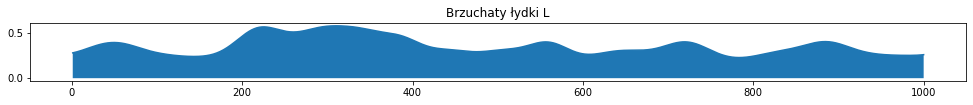

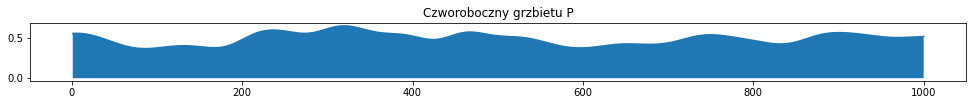

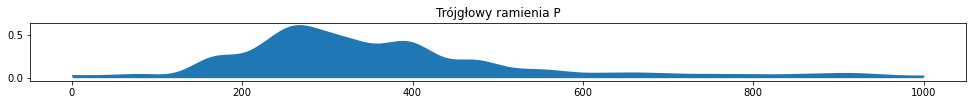

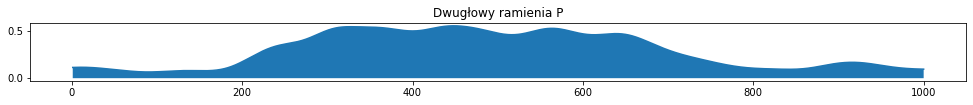

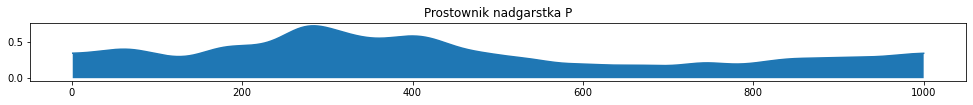

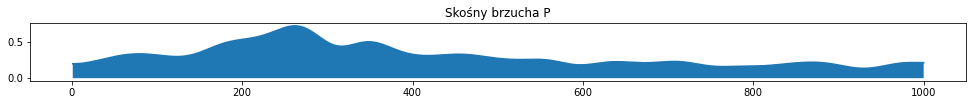

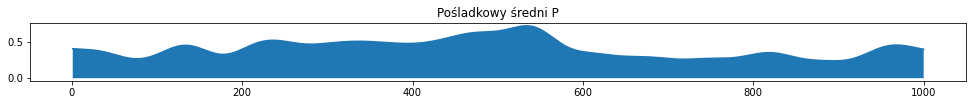

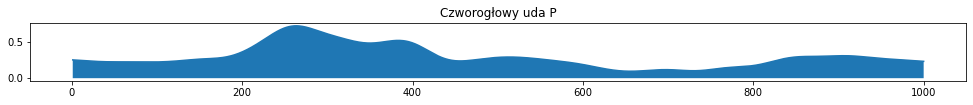

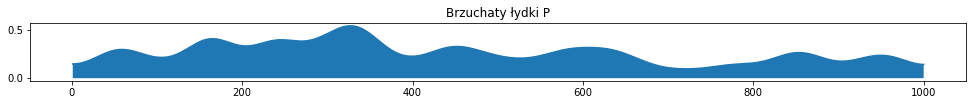

array([[0.42303197, 0.42166277, 0.42024155, ..., 0.39541394, 0.3943905 ,
        0.3932981 ],
       [0.04288198, 0.04301935, 0.04315562, ..., 0.04017913, 0.04021929,
        0.04026247],
       [0.22605653, 0.22577629, 0.22544177, ..., 0.19685018, 0.19626024,
        0.19566791],
       ...,
       [0.41130476, 0.41034098, 0.40942848, ..., 0.4076209 , 0.40523564,
        0.40286308],
       [0.25332185, 0.25272489, 0.25210005, ..., 0.23524878, 0.23434161,
        0.23343773],
       [0.14742038, 0.14756914, 0.14790846, ..., 0.14290805, 0.14248591,
        0.14227646]])

In [24]:
show_avr2(path,emg_processed=None)

## Przebieg pracy mięśni dla pięciu uderzeń  <a name="przebiegPiec"></a>

In [25]:
import glob

def compare_events_average(folder_path, person, exer_num):
    
    muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
    cons1="\*\*-E0"
    cons2="-*.c3d"
    path=folder_path+person+cons1+exer_num+cons2
     
    aver_arr_all=np.zeros((16,1000))     
    
    for file in glob.glob(path,recursive = True):
        print(file)
        emg_processed=normalize_data(file)

        aver_arr=np.zeros((16,1000))  
        file_num=0

        p,d=dp.read_labels(file, 1000)
        for num in range(16):

            for i in range(len(p)):


                emg_processed_event=emg_processed[num][p[i]:d[i]]
                emg_processed_event2 = (
                emg_processed_event.meca.normalize(ref=None, scale=1)                
         )
                time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)

                for t in range(1000):
                    aver_arr[num][t]=aver_arr[num][t]+time_normalized.values[t]

            aver_arr[num]=aver_arr[num]/10
            time=np.linspace(1,1000,1000)

            for t2 in range(1000):
                aver_arr_all[file_num][t2]=aver_arr_all[file_num][t2]+time_normalized.values[t2]
            file_num=file_num+1;
        
    
    for num in range(16):
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=5, 
                    top=0.25, 
                    wspace=0.25, 
                    hspace=0.35)
        aver_arr_all[num]=aver_arr_all[num]/5
        plt.plot(time,aver_arr_all[num])     
        plt.title(muscles_names2[num])
        plt.fill_between(time,aver_arr_all[num])
        plt.show()
    return aver_arr_all

Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T01.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T02.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T03.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T04.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T05.c3d


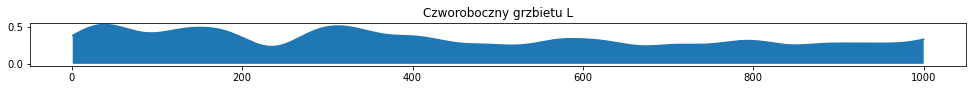

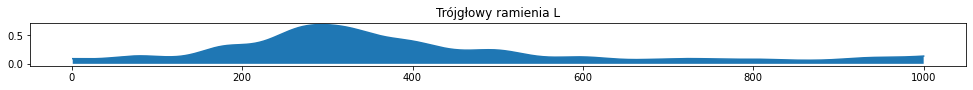

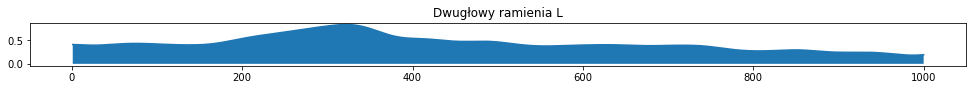

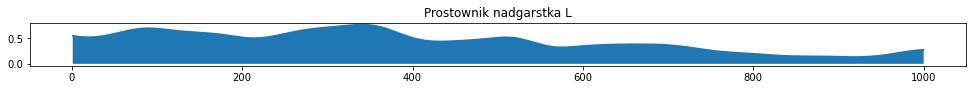

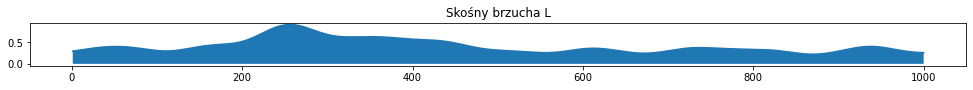

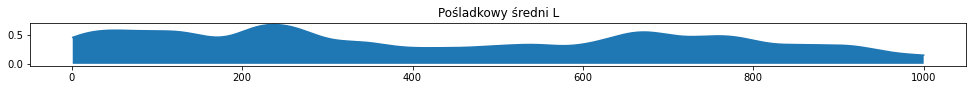

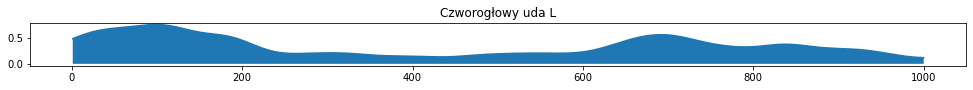

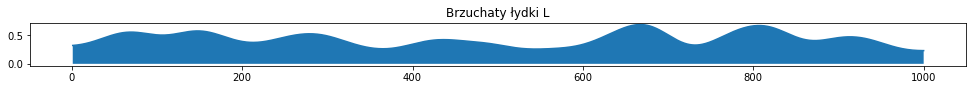

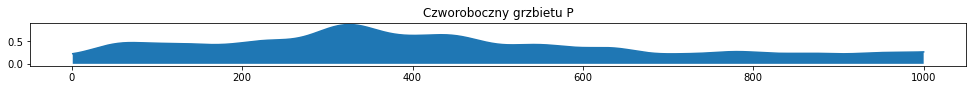

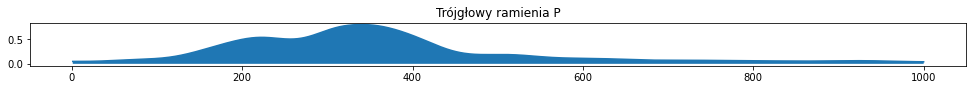

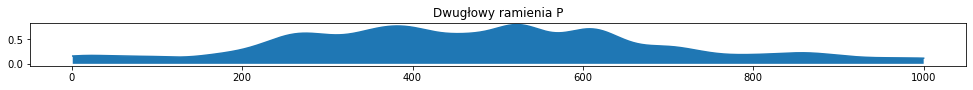

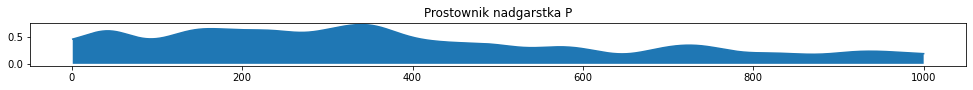

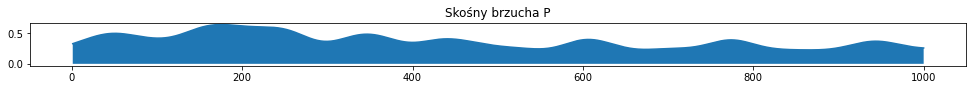

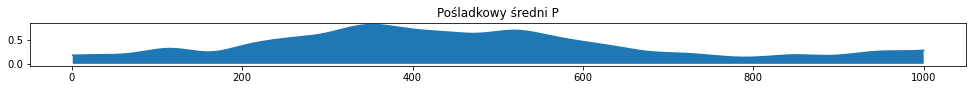

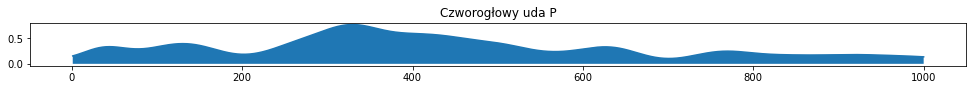

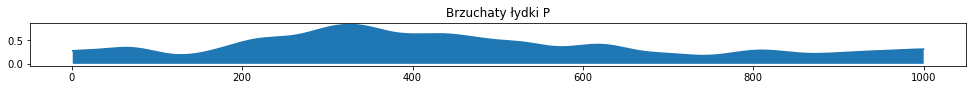

Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E02-T01.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E02-T02.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E02-T03.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E02-T04.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E02-T05.c3d


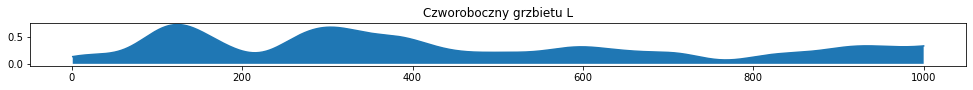

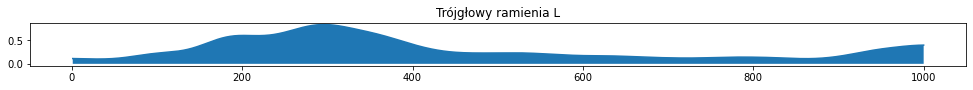

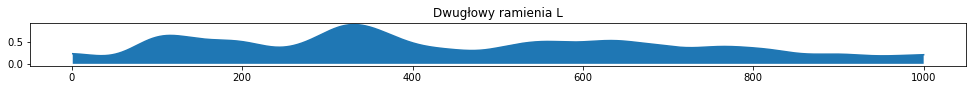

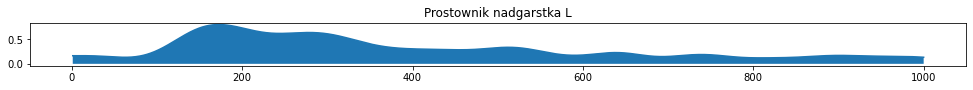

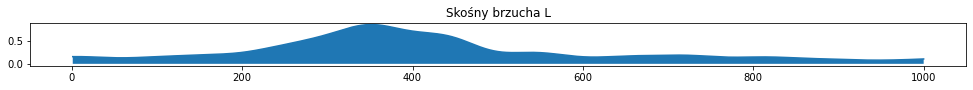

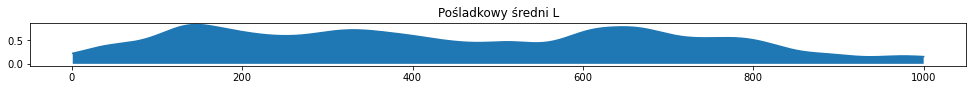

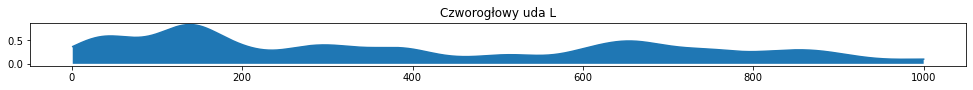

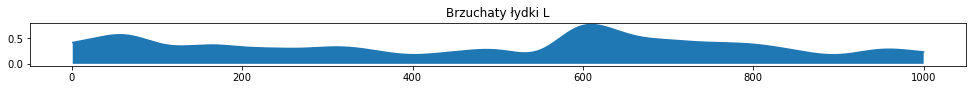

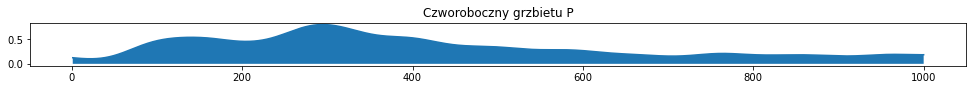

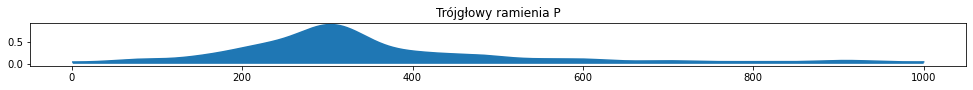

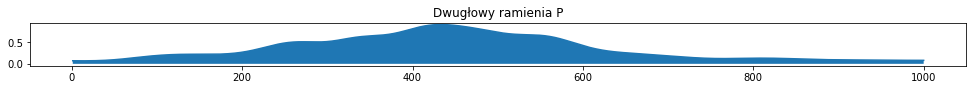

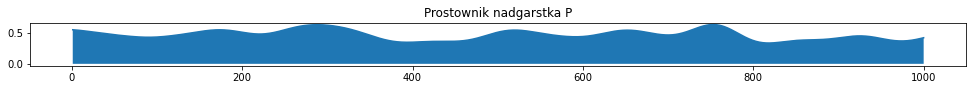

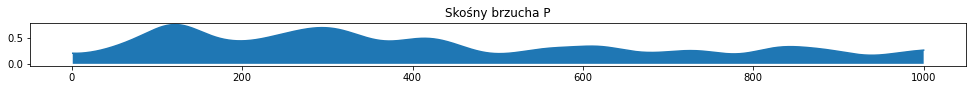

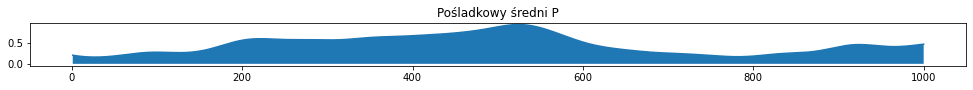

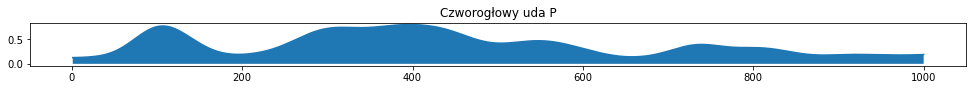

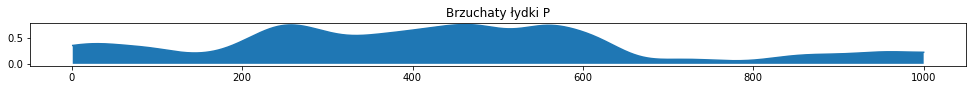

Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E03-T01.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E03-T02.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E03-T03.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E03-T04.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E03-T05.c3d


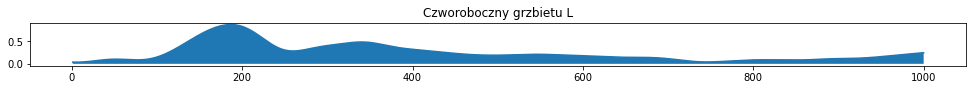

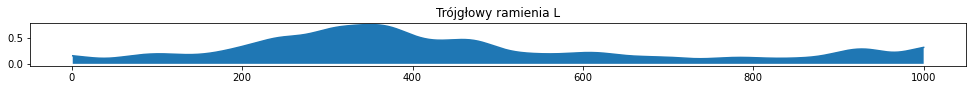

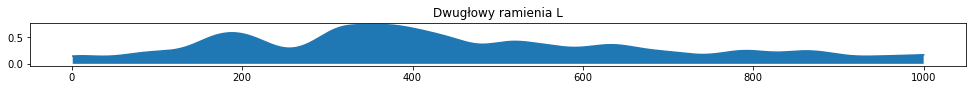

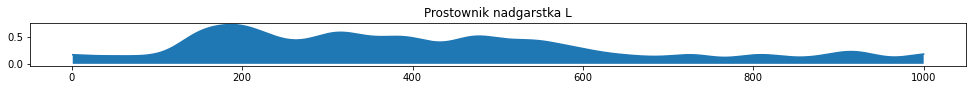

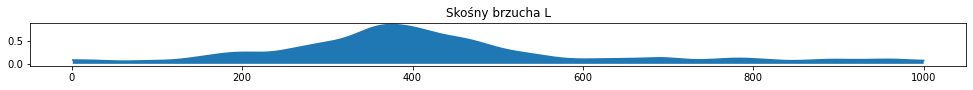

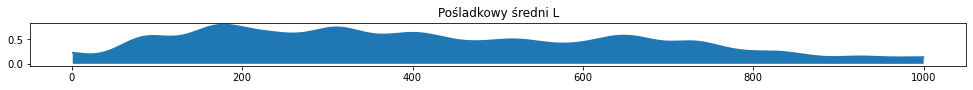

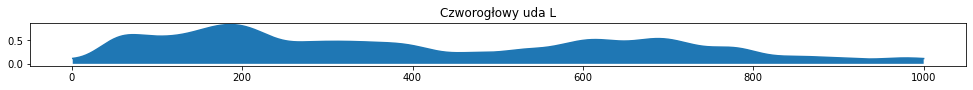

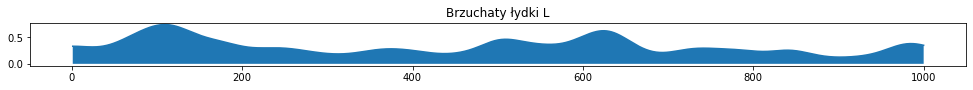

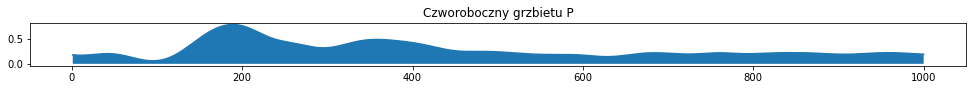

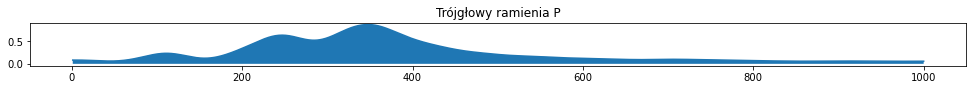

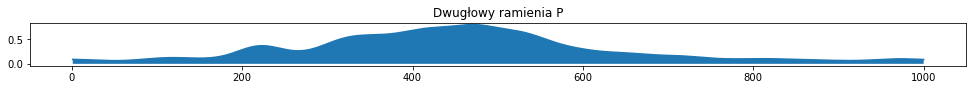

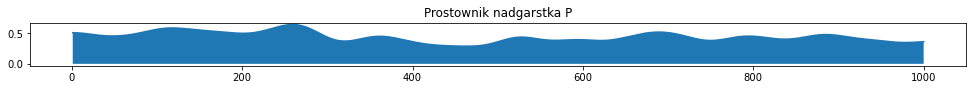

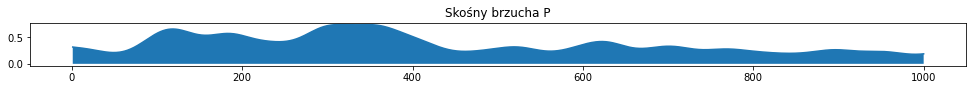

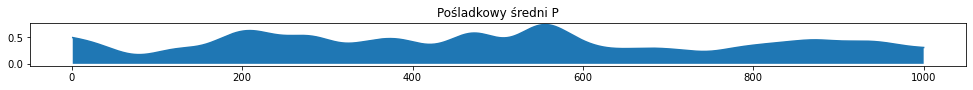

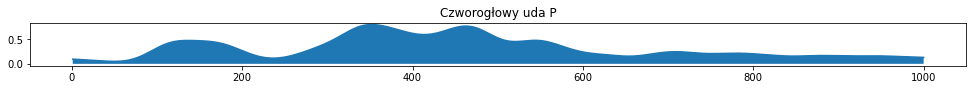

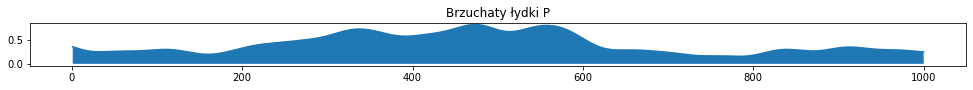

Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E04-T01.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E04-T02.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E04-T03.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E04-T04.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E04-T05.c3d


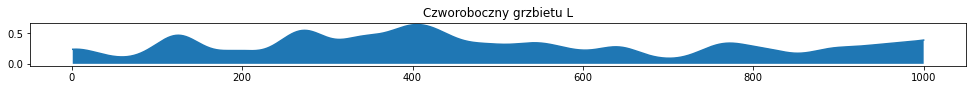

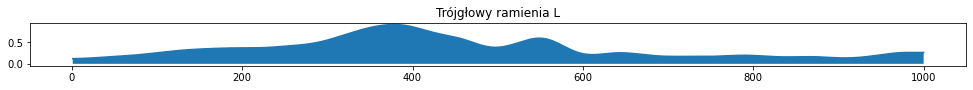

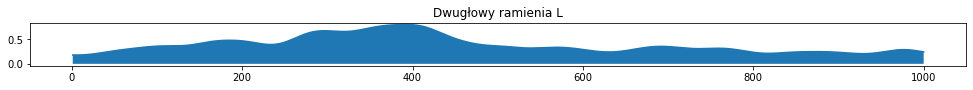

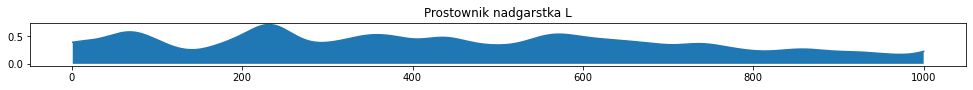

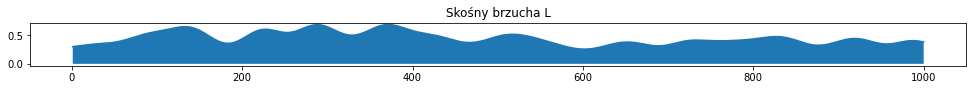

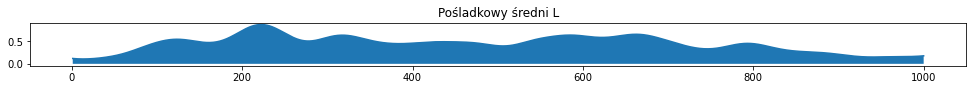

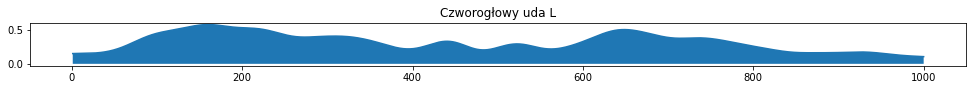

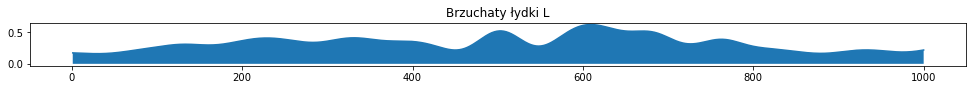

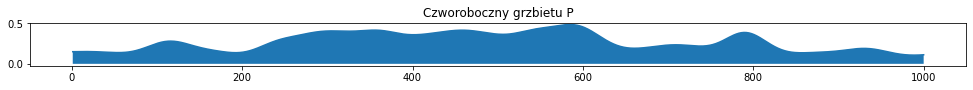

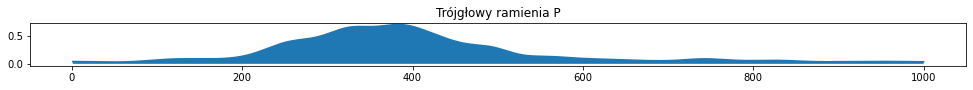

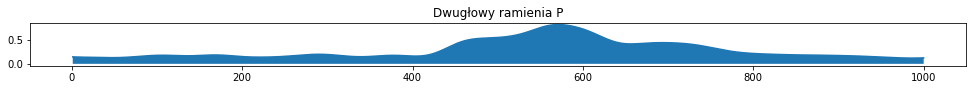

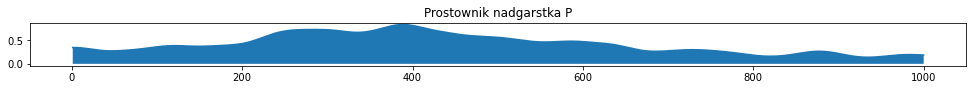

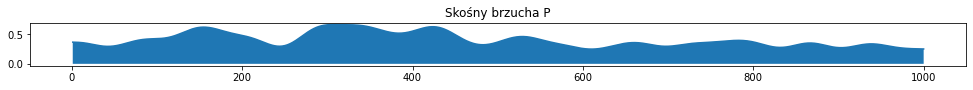

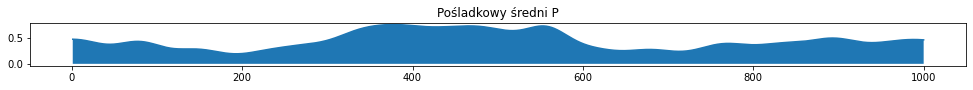

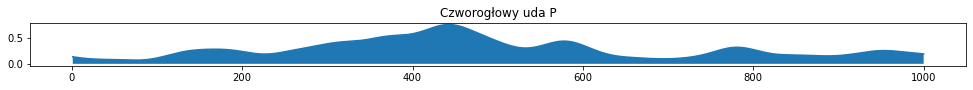

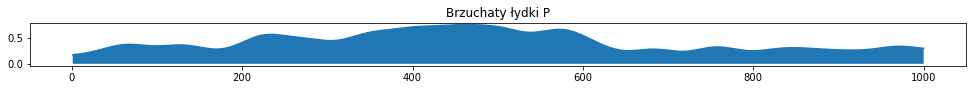

Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E05-T01.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E05-T02.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E05-T03.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E05-T04.c3d
Y:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E05-T05.c3d


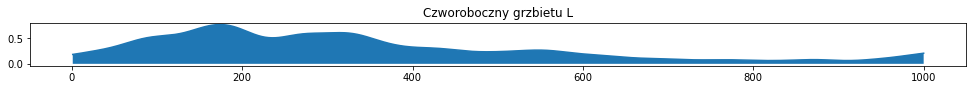

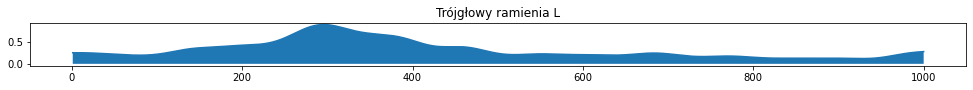

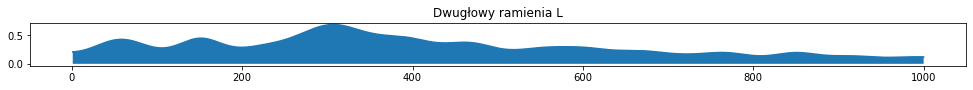

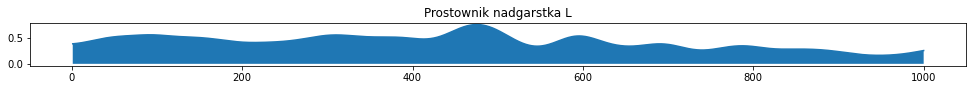

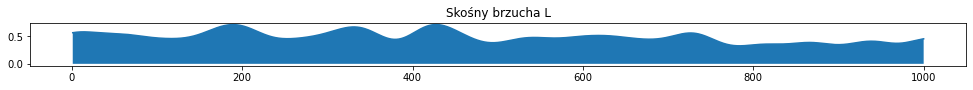

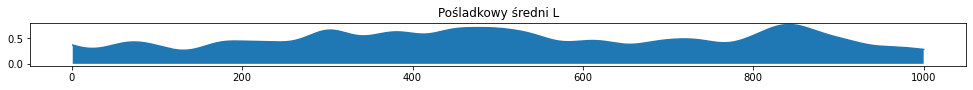

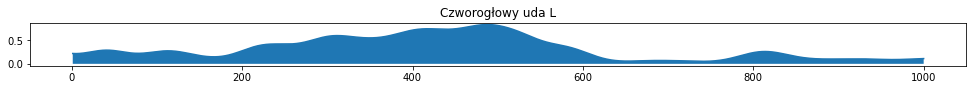

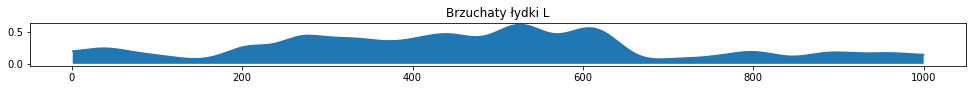

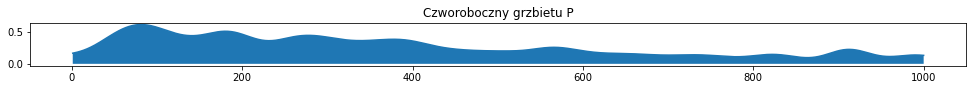

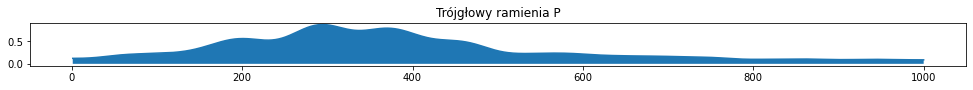

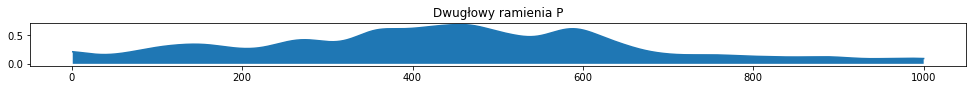

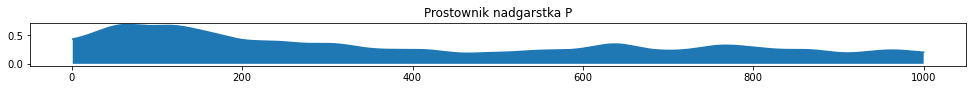

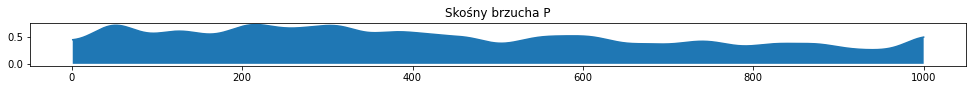

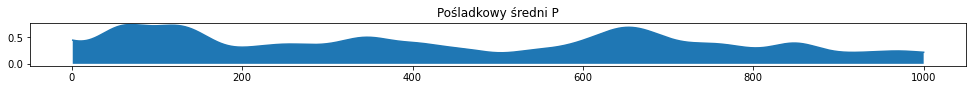

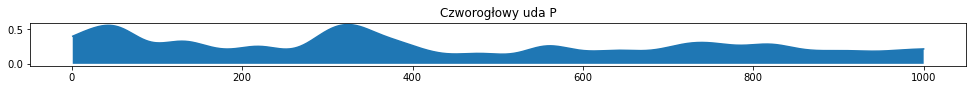

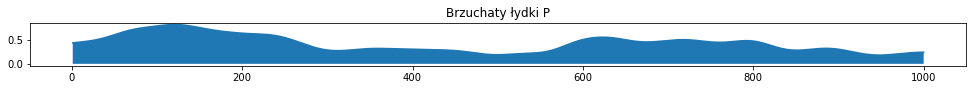

In [26]:
folder_path=r"C:\Users\gmultimedia.PJATK15\Desktop\pjatk_M_K\Dane\\"
folder_path2=r"Y:\Miecz\\"

aver_arr1=compare_events_average(folder_path2,"B0445", "1")
aver_arr2=compare_events_average(folder_path2,"B0445", "2")
aver_arr3=compare_events_average(folder_path2,"B0445", "3")
aver_arr4=compare_events_average(folder_path2,"B0445", "4")
aver_arr5=compare_events_average(folder_path2,"B0445", "5")


## Porównanie pracy mięśni dla pięciu uderzeń na jednym wykresie <a name="porowaniePiec"></a>

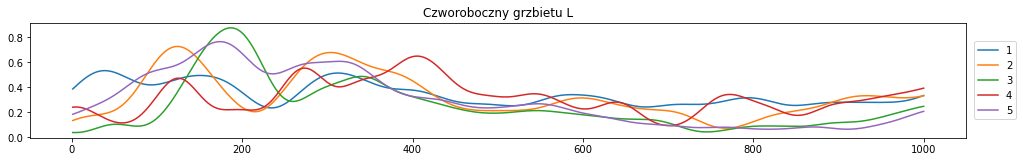

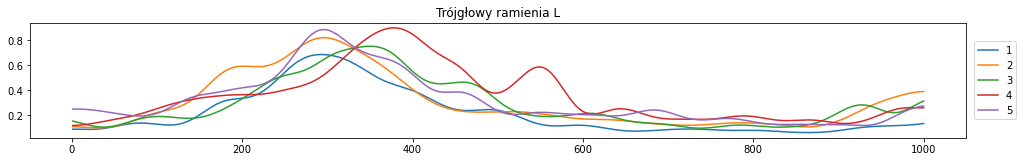

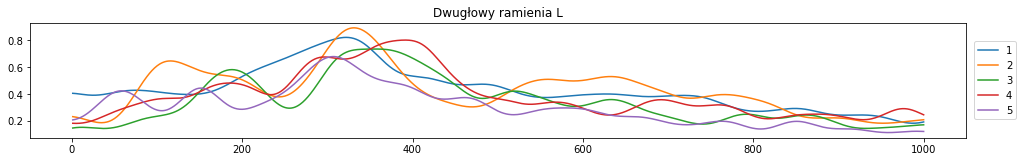

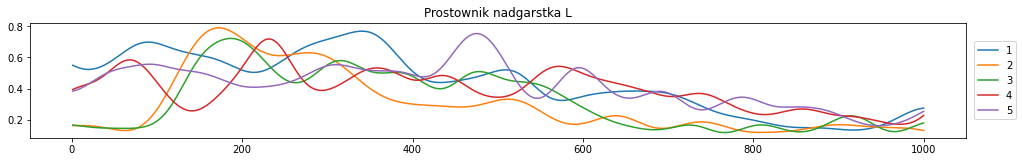

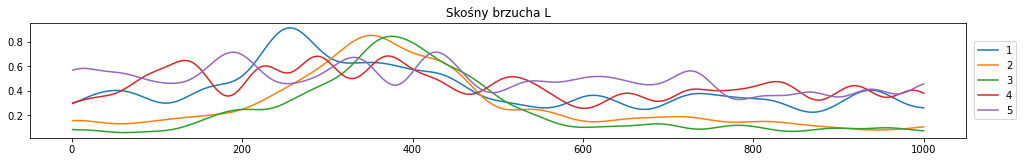

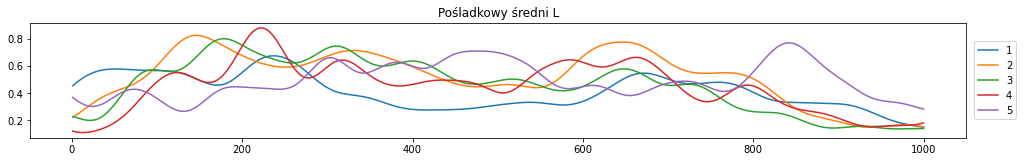

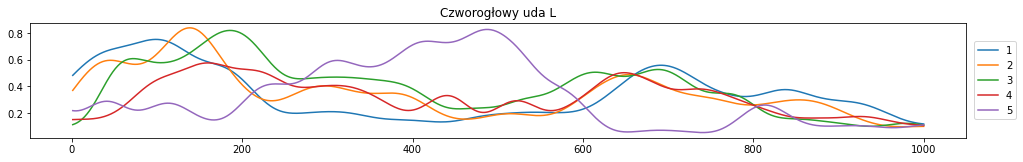

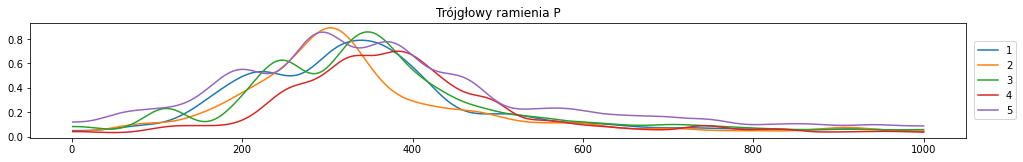

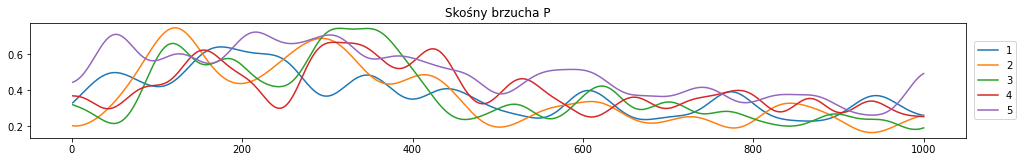

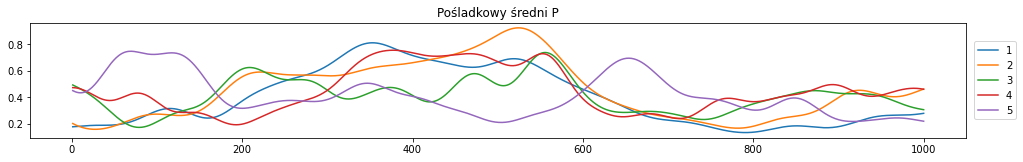

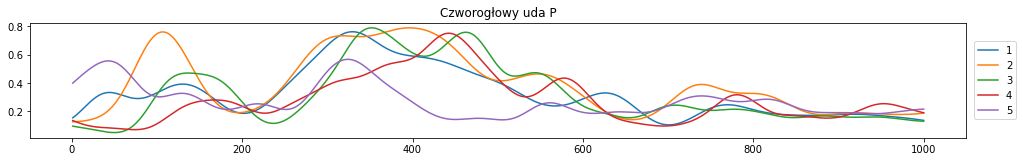

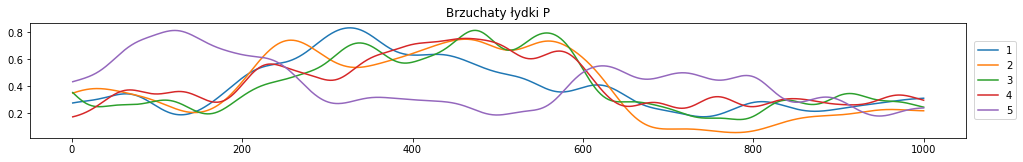

In [27]:
muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
time=np.linspace(1,1000,1000)
aver_arr_all=np.zeros((16,1000))     
for num in range(16):
    subplot(1, 2, 1)
    plt.subplots_adjust(left=0.125,
                bottom=0.1, 
                right=5, 
                top=0.5, 
                wspace=0.25, 
                hspace=0.35)
    aver_arr_all[num]=aver_arr_all[num]/5
    plt.plot(time,aver_arr1[num], label = "1")
    plt.plot(time,aver_arr2[num], label = "2")
    plt.plot(time,aver_arr3[num], label = "3")   
    plt.plot(time,aver_arr4[num], label = "4")   
    plt.plot(time,aver_arr5[num], label = "5")   
    plt.title(muscles_names2[num])
    plt.legend(loc='right', borderaxespad=-5) # loc = lokalizacja legendy w 'plocie', borderaxespad = oznacza przesunięcie legendy względem wykresu 
    plt.show()